<a href="https://colab.research.google.com/github/GuiRibCarra/Algoritmos-Otimizacao/blob/main/Alg_Otimi_Transporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmo de Otimização: Caso do transporte de produtos

1.   São 14 produtos a serem transportados
2.   Cada produto possui: nome, volume e valor de venda
3.   O objetivo é fazer a maximização dos produtos que darão maior lucro para serem transportados
4.   O caminhao possui uma capacidade maxima de 3m³
5.   A soma do volume de todos os produtos resulta em 4.79m³

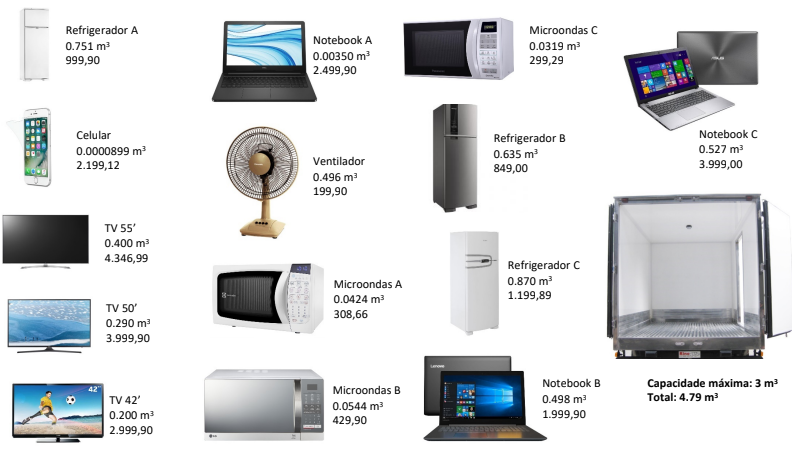



# Bibliotecas

In [ ]:
!pip install mlrose
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=bdb0e60b5e586e594dbce0318e325eae59abc3034b31cb4fb0c1d4891e2768bf
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


# Representação do Problema

In [ ]:
produtos = [('Refrigerador A', 0.751, 999.90),
            ('Celular', 0.0000899, 2911.12),
            ('TV 55', 0.400, 4346.99),
            ('TV 50', 0.290, 3999.90),
            ('TV 42', 0.200, 2999.00),
            ('Notebook A', 0.00350, 2499.90),
            ('Ventilador', 0.496, 199.90),
            ('Microondas A', 0.0424, 308.66),
            ('Microondas B', 0.0544, 429.90),
            ('Microondas C', 0.0319, 299.29),
            ('Refrigerador B', 0.635, 849.00),
            ('Refrigerador C', 0.870, 1199.89),
            ('Notebook B', 0.498, 1999.90),
            ('Notebook C', 0.527, 3999.00)]
capacidade_maxima = 3

## Funções


In [ ]:
def imprimir_solucao(solucao,custo):
  for i in range(len(solucao)):
    if solucao[i] == 1:
      print('%s - %s' % (produtos[i][0], produtos[i][2]))
  print('O melhor custo é: '+str(custo))

def fitness_function(solucao):
  custo = 0
  soma_espaco = 0
  for i in range(len(solucao)):
    if solucao[i] == 1:
      custo += produtos[i][2]
      soma_espaco += produtos[i][1]
  if soma_espaco > capacidade_maxima:
    custo = 1
  return custo


fitness = mlrose.CustomFitness(fitness_function)
problema = mlrose.DiscreteOpt(length = 14, fitness_fn = fitness,
                              maximize = True, max_val = 2)

# Métodos Utilizados

## Hill climb

In [ ]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema)
imprimir_solucao(melhor_solucao,melhor_custo)

Refrigerador A - 999.9
Celular - 2911.12
TV 55 - 4346.99
Notebook A - 2499.9
Ventilador - 199.9
Microondas A - 308.66
Microondas B - 429.9
Microondas C - 299.29
Refrigerador B - 849.0
Notebook C - 3999.0
O melhor custo é: 16843.66


## Simulated Annealing

In [ ]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema)
imprimir_solucao(melhor_solucao,melhor_custo)

TV 55 - 4346.99
TV 50 - 3999.9
Microondas A - 308.66
Microondas B - 429.9
Microondas C - 299.29
Refrigerador B - 849.0
Refrigerador C - 1199.89
Notebook B - 1999.9
O melhor custo é: 13433.529999999999


## Algoritmo Genético

In [ ]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema, pop_size=500, mutation_prob=0.2)
imprimir_solucao(melhor_solucao,melhor_custo)

Celular - 2911.12
TV 55 - 4346.99
TV 50 - 3999.9
TV 42 - 2999.0
Notebook A - 2499.9
Microondas A - 308.66
Microondas B - 429.9
Microondas C - 299.29
Refrigerador C - 1199.89
Notebook B - 1999.9
Notebook C - 3999.0
O melhor custo é: 24993.550000000003
